In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import warnings

warnings.filterwarnings("ignore")

In [6]:
data = '1.csv'
df = pd.read_csv(data)

df = df[(df.正負樣本 == 1) | (df.正負樣本 == -1)]

In [7]:
# 查看數據集的維度
df.shape

(321, 16)

In [8]:
# 讓我們預覽數據集
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,股價_Test,董監持股_Test,符合數量,正負樣本
0,1101,台泥,11.00,3.69,26.64,5.87,39.85,8.38,1,1,1,1,1,0,5,1
1,1102,亞泥,9.81,4.05,24.67,6.29,44.05,27.37,0,1,1,1,1,1,5,1
5,1109,信大,14.89,2.40,30.69,5.75,17.40,36.22,1,1,1,1,1,1,6,1
7,1203,味王,12.00,1.86,32.54,3.41,32.30,28.84,1,1,1,0,1,1,5,1
9,1213,大飲,-9.02,-0.89,4.96,0.00,7.58,12.91,0,0,0,0,1,1,2,-1


In [11]:
# 查看數據集摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 829
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   代碼          321 non-null    int64  
 1   股票          321 non-null    object 
 2   ROE_5Y      321 non-null    float64
 3   EPS_5Y      321 non-null    float64
 4   毛利率_5Y      321 non-null    float64
 5   現金殖利率       321 non-null    float64
 6   股價          321 non-null    float64
 7   董監持股        321 non-null    float64
 8   ROE_Test    321 non-null    int64  
 9   EPS_Test    321 non-null    int64  
 10  毛利率_Test    321 non-null    int64  
 11  現金殖利率_Test  321 non-null    int64  
 12  股價_Test     321 non-null    int64  
 13  董監持股_Test   321 non-null    int64  
 14  符合數量        321 non-null    int64  
 15  正負樣本        321 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 42.6+ KB


In [12]:
col_names = ['ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率', '股價', '董監持股(%)','ROE_Test']

for col in col_names:
    
    print(df[col].value_counts())

 4.47     3
 14.37    3
 11.00    2
 16.66    2
-0.69     2
         ..
 16.45    1
-31.59    1
-20.04    1
 9.28     1
 8.58     1
Name: ROE_5Y, Length: 304, dtype: int64
-0.28    4
-0.10    3
 3.10    3
 3.78    3
 3.61    3
        ..
 5.46    1
-0.52    1
-5.66    1
-0.92    1
 2.61    1
Name: EPS_5Y, Length: 265, dtype: int64
 11.54    3
 4.54     2
 10.39    2
 27.33    2
 8.90     2
         ..
-28.21    1
 30.21    1
 10.71    1
 49.83    1
 16.63    1
Name: 毛利率_5Y, Length: 304, dtype: int64
0.00    25
5.87     3
1.42     3
5.63     3
5.07     3
        ..
2.06     1
6.09     1
0.73     1
8.32     1
1.81     1
Name: 現金殖利率, Length: 258, dtype: int64
41.00    3
28.00    3
23.20    3
66.80    2
17.45    2
        ..
20.90    1
44.20    1
68.50    1
30.85    1
83.20    1
Name: 股價, Length: 292, dtype: int64


KeyError: '董監持股(%)'

In [13]:
df['正負樣本'].value_counts()

 1    181
-1    140
Name: 正負樣本, dtype: int64

In [14]:
df.isnull().sum()

代碼            0
股票            0
ROE_5Y        0
EPS_5Y        0
毛利率_5Y        0
現金殖利率         0
股價            0
董監持股          0
ROE_Test      0
EPS_Test      0
毛利率_Test      0
現金殖利率_Test    0
股價_Test       0
董監持股_Test     0
符合數量          0
正負樣本          0
dtype: int64

In [15]:
X = df.drop(['代碼', '股票', 'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '股價_Test', '董監持股_Test','符合數量','正負樣本'], axis=1)

y = df['正負樣本']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
X_train.shape, X_test.shape

((215, 6), (106, 6))

In [18]:
X_train.dtypes

ROE_5Y    float64
EPS_5Y    float64
毛利率_5Y    float64
現金殖利率     float64
股價        float64
董監持股      float64
dtype: object

In [19]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股
315,-32.98,-1.98,-9.78,0.00,3.15,9.33
203,-13.11,-2.10,2.03,0.61,21.15,34.75
518,-0.32,-0.07,13.57,4.24,20.30,19.07
44,6.78,5.62,24.05,6.63,54.30,17.29
494,2.52,0.55,40.29,8.95,28.15,18.72


In [20]:
import category_encoders as ce

In [22]:
encoder = ce.OrdinalEncoder(cols=['ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率', '股價', '董監持股'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [23]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股
315,1,1,1,1,1,1
203,2,2,2,2,2,2
518,3,3,3,3,3,3
44,4,4,4,4,4,4
494,5,5,5,5,5,5


In [24]:
X_test.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股
467,-1.0,-1.0,-1.0,-1.0,170.0,-1.0
365,-1.0,-1.0,-1.0,-1.0,79.0,-1.0
513,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
18,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
305,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
y_pred_gini = clf_gini.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4528


In [29]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [30]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6884


In [31]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.6884
Test set score: 0.4528


[Text(0.375, 0.875, 'X[3] <= 3.5\ngini = 0.494\nsamples = 215\nvalue = [96, 119]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.5, 0.625, 'X[2] <= 61.5\ngini = 0.478\nsamples = 197\nvalue = [78, 119]'),
 Text(0.25, 0.375, 'X[0] <= 50.5\ngini = 0.414\nsamples = 58\nvalue = [17, 41]'),
 Text(0.125, 0.125, 'gini = 0.463\nsamples = 44\nvalue = [16, 28]'),
 Text(0.375, 0.125, 'gini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.75, 0.375, 'X[2] <= 79.5\ngini = 0.493\nsamples = 139\nvalue = [61, 78]'),
 Text(0.625, 0.125, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.875, 0.125, 'gini = 0.475\nsamples = 124\nvalue = [48, 76]')]

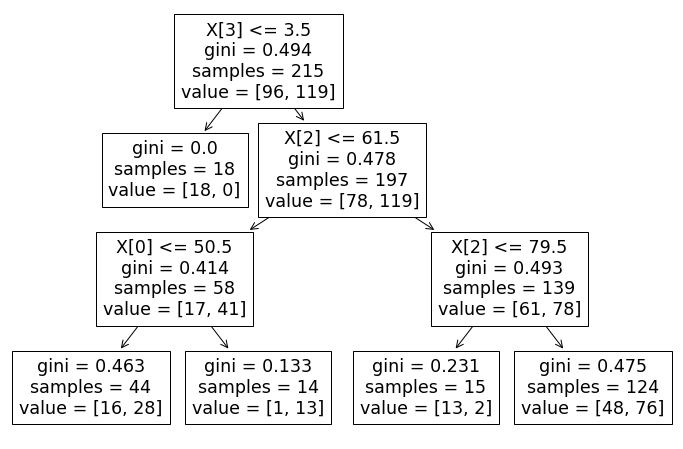

In [32]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 